In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras import optimizers, losses
from tensorflow.keras.callbacks import ModelCheckpoint
from keras.layers import Conv2D, MaxPooling2D,Dropout,BatchNormalization
from keras.layers import Dense, Activation, Flatten
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import image as mpimg

In [15]:
from PIL import Image

In [16]:
image = Image.open('6.jpg')

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [3]:
train_data_dir = '/content/drive/My Drive/spec_data/train'

In [4]:
train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2) # set validation split

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(300, 300),
    batch_size=30,
    class_mode='binary',
    subset='training') # set as training data

validation_generator = train_datagen.flow_from_directory(
    train_data_dir, # same directory as training data
    target_size=(300, 300),
    batch_size=30,
    class_mode='binary',
    subset='validation') # set as validation data

Found 1600 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


In [5]:
sample_training_images, _ = next(train_generator)

In [6]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

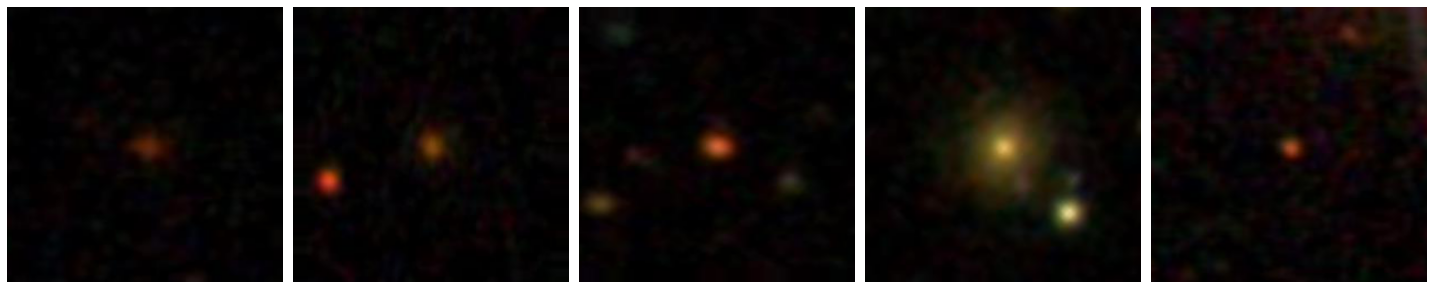

In [7]:
plotImages(sample_training_images[:5])

In [ ]:
base_model = InceptionV3(weights=None, include_top=False, input_shape=(300, 300, 3))

In [ ]:
base_model.load_weights('inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5')

In [ ]:
base_model.trainable = False

In [8]:
model = Sequential()
model.add(Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='valid', input_shape=(300, 300, 3)))
model.add(BatchNormalization())

model.add(Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='valid'))
model.add(BatchNormalization())

model.add(MaxPooling2D((2, 2)))
# model.add(Dropout(0.2))

model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='valid'))
model.add(BatchNormalization())

model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='valid'))
model.add(BatchNormalization())

model.add(MaxPooling2D((2, 2)))
# model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='valid'))
model.add(BatchNormalization())

# model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='valid'))
# model.add(BatchNormalization())

model.add(MaxPooling2D((2, 2)))
# model.add(Dropout(0.2))

# model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='valid'))
# model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_108 (Conv2D)         (None, 298, 298, 16)      448       
                                                                 
 batch_normalization_110 (Ba  (None, 298, 298, 16)     64        
 tchNormalization)                                               
                                                                 
 conv2d_109 (Conv2D)         (None, 296, 296, 16)      2320      
                                                                 
 batch_normalization_111 (Ba  (None, 296, 296, 16)     64        
 tchNormalization)                                               
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 148, 148, 16)     0         
 g2D)                                                            
                                                      

In [12]:
# Using the Adam Optimizer to set the learning rate of our final model
opt = optimizers.Adam(learning_rate=1)

# Compiling and setting the parameters we want our model to use
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=['accuracy'])

In [10]:
# Setting variables for the model
batch_size = 32
epochs = 1


In [13]:
# Calculating variables for the model
steps_per_epoch = train_generator.n // batch_size
validation_steps = validation_generator.n // batch_size

print("steps_per_epoch :", steps_per_epoch)
print("validation_steps :", validation_steps)

steps_per_epoch : 50
validation_steps : 12


In [14]:
filepath = "model_{epoch:02d}-{val_accuracy:.2f}.h5"

# Using the ModelCheckpoint function to train and store all the best models
checkpoint1 = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

callbacks_list = [checkpoint1]
# Training the Model
history = model.fit_generator(generator=train_generator, epochs=epochs, steps_per_epoch=steps_per_epoch,
                              validation_data=validation_generator, validation_steps=validation_steps,
                              callbacks=callbacks_list)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  # Remove the CWD from sys.path while we load stuff.


50/50 [==============================] - ETA: 0s - loss: 0.0000e+00 - accuracy: 0.5054
Epoch 1: val_accuracy improved from -inf to 0.50000, saving model to model_01-0.50.h5
50/50 [==============================] - 181s 3s/step - loss: 0.0000e+00 - accuracy: 0.5054 - val_loss: 0.0000e+00 - val_accuracy: 0.5000


In [19]:
numpydata = np.asarray(image)

X = numpydata/255.0

In [21]:
X =X.reshape(1,X.shape[0],X.shape[1],3)

In [22]:
X.shape

(1, 300, 300, 3)

In [31]:
model.predict(numpydata_scaled)

1/1 [==============================] - 0s 16ms/step


array([[1.]], dtype=float32)

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

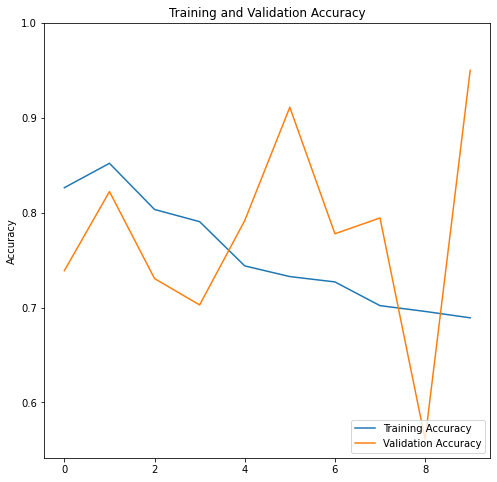

In [ ]:
plt.figure(figsize=(8, 8))
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')
plt.show()